In [139]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ctypes
from time import time

In [122]:
def UnaryCode(n):
    return n + 1

def TruncatedBinaryCode(n, m):
    b = int(np.ceil(np.log(m + 0.) / np.log(2.0)))
    small = (n < (2 ** b - m))
    return (b - 1) * small + b * (1 - small)

def GolombCompress(data, m):
    res = np.sum(UnaryCode(data / m)) + np.sum(TruncatedBinaryCode(data % m, m))
    return res

In [123]:
def Generate():
    filenames = []
    for i in (0.001, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1, 0.5, 0.7):
        data = np.random.geometric(i, 1000000)
        filename = str(int(1000 * i))
        filenames.append(filename)
        with open(filename, 'w') as outputfile:
            for el in data:
                outputfile.write(str(el) + '\n')
    return filenames

In [134]:
def SaveCompCoeffs(filenames):
    compcoeffs = np.zeros((len(filenames), 512), dtype=np.float64)
    thetime = time()
    for i in xrange(len(filenames)):
        data = []
        j = 0
        with open(filenames[i], 'r') as inputfile:
            for line in inputfile:
                j += 1
                if len(line) == 0:
                    break
                n = int(line.strip())
                data.append(n)
                #if (j+1) % 200000 == 0:
                #    print i, j
        print i, "data size is", len(data), time() - thetime
        original_size = len(data) * ctypes.sizeof(ctypes.c_int) * 8
        data = np.array(data)
        for m in xrange(512):
            coded_size = GolombCompress(data, m + 1)
            #if m % 100 == 0:
            #    print m, time() - thetime
            compcoeffs[i][m] = (original_size + 0.) / coded_size   
    return compcoeffs

In [56]:
thetime = time()
filenames = Generate()
print time() - thetime

136.622800827


In [135]:
thetime = time()
compcoeffs = SaveCompCoeffs(filenames)
print time() - thetime

0 data size is 1000000 2.08464479446
1 data size is 1000000 50.6396329403
2 data size is 1000000 98.9426949024
3 data size is 1000000 147.121159792
4 data size is 1000000 195.237345934
5 data size is 1000000 243.329365969
6 data size is 1000000 291.517242908
7 data size is 1000000 339.65118289
8 data size is 1000000 387.710277796
433.805727959


In [174]:
# now the task
totalcoeffs = np.ravel(np.dot(np.ones((1,9), dtype=np.float64), compcoeffs))
m_opt = np.argmax(totalcoeffs)

In [281]:
print 'm=', m_opt + 1 , compcoeffs[:, m_opt], (totalcoeffs[m_opt]) / compcoeffs.shape[0]

m= 12 [ 0.36494337  1.27794159  1.98655463  2.55080547  5.09261153  5.94558047
  6.38075691  7.75722598  7.94622788] 4.36696086922


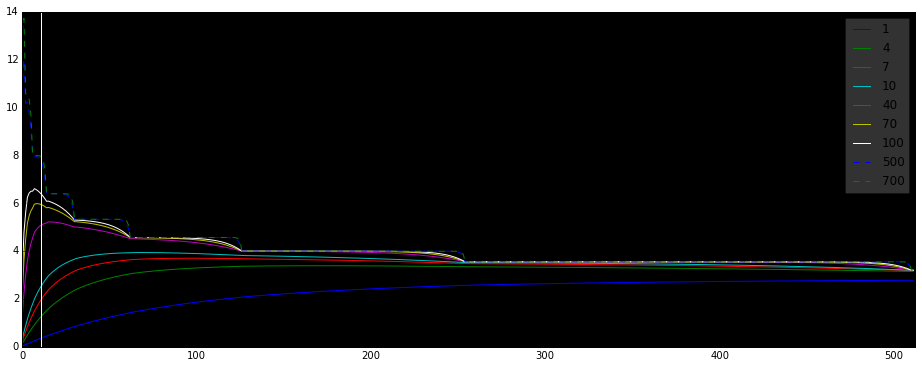

In [200]:
fig = plt.figure(figsize=(16,6))
colors = ('b','g','r','c','m','y','w','b','g')
styles = ('-','-','-','-','-','-','-','--','--')
axes = fig.add_subplot(1, 1, 1, axisbg='black')
for i in xrange(9):
    plt.plot(compcoeffs[i, :], c=colors[i], ls=styles[i], label = filenames[i])
xlim = plt.xlim([0,512])
plt.axvline(x=m_opt, ymin=0, ymax=14, color = 'white')
plt.legend(framealpha=0.2)

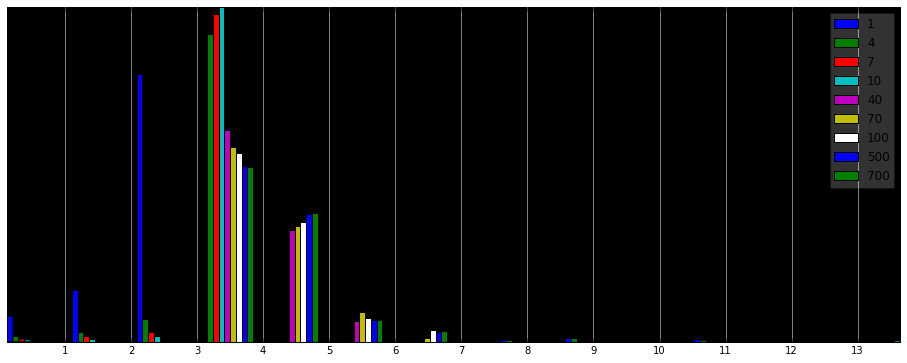

In [240]:
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1, axisbg='black')
axes.grid(True, color='w', ls='-')
plt.xticks(range(15))
plt.gca().yaxis.set_major_locator(plt.NullLocator())
hist = plt.hist(compcoeffs.transpose(), label=filenames, color=colors, bins=14)
plt.legend(framealpha=0.2, loc = 'upper right')

In [254]:
l = np.argmin(compcoeffs[:, m_opt])
with open(filenames[l], 'r') as inputfile:
    data = []
    for line in inputfile:
        if len(line) == 0:
             break
        n = int(line.strip())
        data.append(n)
data = np.array(data)

In [282]:
p = (data.shape[0] + 0.) / np.sum(data)
p_g = (int(filenames[l]) + 0.) / 1000
print 'p from data =', p, ', p from generator =', p_g

p from data = 0.00100053854387 , p from generator = 0.001


In [259]:
m_opt_l = np.argmax(compcoeffs[l,:])
print m_opt_l+1, compcoeffs[l,m_opt_l]

512 2.78268007745


In [278]:
def Vurhis(p):
    for m in xrange(512):
        if p ** (m + 1) + p ** (m + 2) <= 1 and 1 < p ** (m + 1) + p ** m:
            return m+1#, p, p ** (m + 1) + p ** (m + 2),  p ** (m + 1) + p ** m
    return 512

In [285]:
print 'best m theoretical', Vurhis(p), ', comp. ', compcoeffs[l, Vurhis(p) - 1]

best m theoretical 1 , comp.  0.0319131744008
